In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

In [3]:
df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
active_df = pd.DataFrame()

In [5]:
TempDiffList = []
for rowindex in range(len(df)):
    TempDiffList.append(abs(df.temperature[rowindex] - df.apparenttemperature[rowindex]))
active_df['TempDiff'] = TempDiffList

In [6]:
active_df['Humidity'] = df.humidity.copy()
active_df['Windspeed'] = df.windspeed.copy()

In [7]:
active_df.head()

,TempDiff,Humidity,Windspeed
0,2.083333,0.89,14.1197
1,2.127778,0.86,14.2646
2,0.000000,0.89,3.9284
3,2.344444,0.83,14.1036
4,1.777778,0.83,11.0446


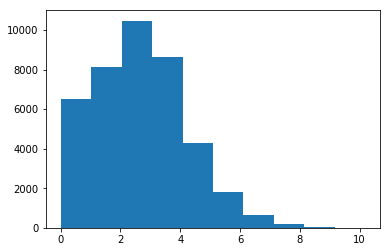

55776
96453


In [8]:
# Not normally distributed, and over half of the entries are 0! Still not normal when only looking at non-zero
# entries but a transformation could likely fix that.
plt.hist(active_df.TempDiff[active_df.TempDiff>0])
plt.show()
print(len(active_df.TempDiff[active_df.TempDiff == 0]))
print(len(active_df))

In [9]:
import statsmodels.api as sm

Y = active_df['TempDiff']
X = active_df.iloc[:, 1:]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TempDiff   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 1.817e+04
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        08:16:02   Log-Likelihood:            -1.6955e+05
No. Observations:               96453   AIC:                         3.391e+05
Df Residuals:                   96450   BIC:                         3.391e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1545      0.021   -103.434      0.000      -2.195      -2.114
Humidity       2.7523      0.024    116.006      0.000       2.706       2.799
Windspeed      0.1164      0.001    173.471      0.000       0.115       0.118
==============================================================================
Omnibus:                     4383.672   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5115.085
Skew:                           0.520   Prob(JB):                         0.00
Kurtosis:                       3.439   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# The coefficients are statistically significant! R^2 = 0.274, which is not good...

In [12]:
humidity_windspeed_list = []
for rowindex in range(len(df)):
    humidity_windspeed_list.append(active_df.Humidity[rowindex]*active_df.Windspeed[rowindex])
active_df['HumidityWindspeed'] = humidity_windspeed_list

In [14]:
import statsmodels.api as sm

Y = active_df['TempDiff']
X = active_df.iloc[:, 1:]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TempDiff   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        08:17:13   Log-Likelihood:            -1.6536e+05
No. Observations:               96453   AIC:                         3.307e+05
Df Residuals:                   96449   BIC:                         3.308e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3000      0.033      9.101      0.000       0.235       0.365
Humidity             -0.5911      0.042    -13.957      0.000      -0.674      -0.508
Windspeed            -0.1024      0.002    -42.204      0.000      -0.107      -0.098
HumidityWindspeed     0.3098      0.003     93.526      0.000       0.303       0.316
==============================================================================
Omnibus:                     5377.803   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9918.620
Skew:                           0.425   Prob(JB):                         0.00
Kurtosis:                       4.322   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R^2 went up to .334, all 3 coefficients are significant. The sign for windspped and humidity DID change
# from positive to negative. However, if they're both negative, they multiply to actually increase the
# difference in temp in this model. Interesting.